In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

from utils import config, utils

In [16]:
df, df_cv = utils.Utils.load_data()
df = df[df["label"] != "neutral"]
df_cv = df_cv[df_cv["label"] != "neutral"]

Test 1:
- lemmatizing: No
- Additional removal of words: No
- Remove URLs: No

In [17]:
nltk_rf_model_1 = utils.CustomPipeline(
    df,
    config.FEATURES,
    config.TARGET, 
    df_cv = df_cv,
    steps=[
        ("preprocessor", ColumnTransformer(
             transformers=[
                (f'nltk_{feature}', Pipeline([
                ('compound_splitter', utils.CompoundWordSplitter()),
                ('tokenizer', utils.NLTKTokenizer(extra_stop_words=False, lemmatize=False, remove_urls=False)),
                ('tfidf', TfidfVectorizer())
            ]), feature) for feature in config.FEATURES]
        )),
        ("classifier", RandomForestClassifier(random_state=config.RANDOM_STATE))
    ],
    model_name="nltk_rf_1"
)

In [18]:
# nltk_rf_model_1.fit(False)
# nltk_rf_model_1.evaluate(False)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.1s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.3s
Classification Report for nltk_rf_1 - balanced train data:
Classification Report - Validation set
               precision    recall  f1-score   support

    negative       0.78      0.96      0.86        74
    positive       0.96      0.80      0.88       102

    accuracy                           0.87       176
   macro avg       0.87      0.88      0.87       176
weighted avg       0.89      0.87      0.87       176

Classification Report - Crossvalidation set
               precision    recall  f1-score   support

    negative       0.42      0.66      0.51       600
    positive       0.66      0.41      0.51       949

    accuracy                           0.51      1549
   macro avg       0.54      0.54      0.51      1549
weighted avg       0.57      0.51      0.51      1549



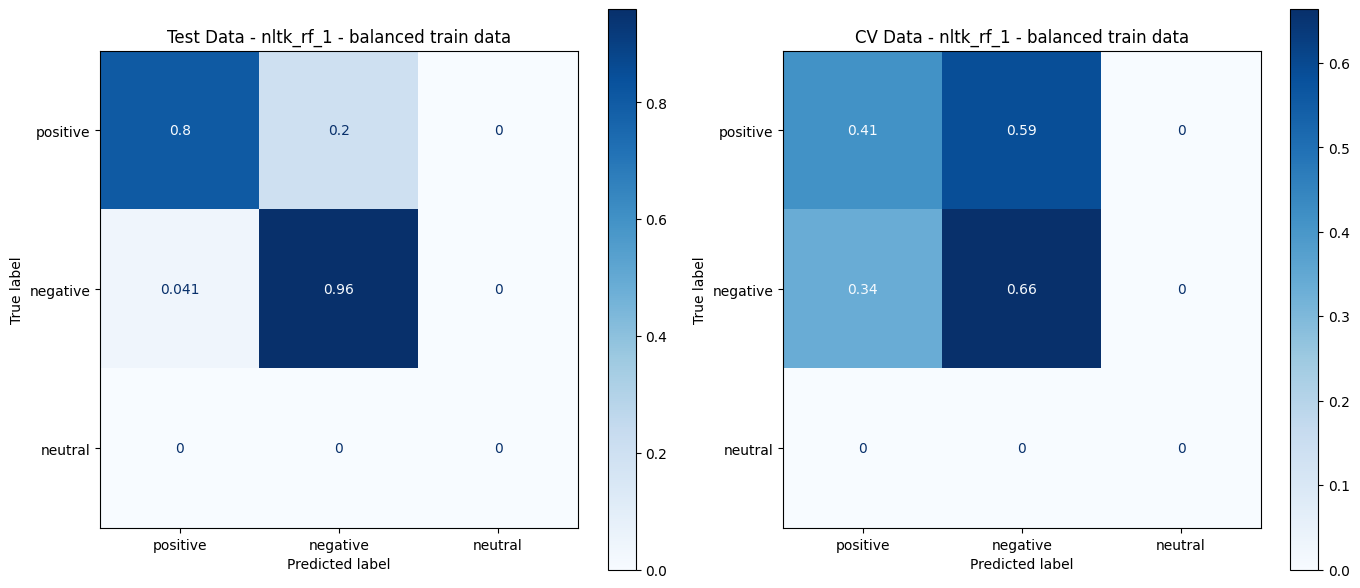

In [19]:
nltk_rf_model_1.fit(True)
nltk_rf_model_1.evaluate(True)

In [20]:
nltk_rf_model_1.dump(config.MODEL_DIR)

Test 2:
- Lemmatizing: No
- Additional reomval of words: Yes
- Remove Urls: No

In [21]:
nltk_rf_model_2 = utils.CustomPipeline(
    df,
    config.FEATURES,
    config.TARGET, 
    df_cv = df_cv,
    steps=[
        ("preprocessor", ColumnTransformer(
             transformers=[
                (f'nltk_{feature}', Pipeline([
                ('compound_splitter', utils.CompoundWordSplitter()),
                ('tokenizer', utils.NLTKTokenizer(extra_stop_words=True, lemmatize=False, remove_urls=False)),
                ('tfidf', TfidfVectorizer())
            ]), feature) for feature in config.FEATURES]
        )),
        ("classifier", RandomForestClassifier(random_state=config.RANDOM_STATE))
    ],
    model_name="nltk_rf_2"
)

In [22]:
# nltk_rf_model_2.fit(False)
# nltk_rf_model_2.evaluate(False)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.1s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.3s
Classification Report for nltk_rf_2 - balanced train data:
Classification Report - Validation set
               precision    recall  f1-score   support

    negative       0.84      0.93      0.88        74
    positive       0.95      0.87      0.91       102

    accuracy                           0.90       176
   macro avg       0.89      0.90      0.90       176
weighted avg       0.90      0.90      0.90       176

Classification Report - Crossvalidation set
               precision    recall  f1-score   support

    negative       0.41      0.45      0.42       600
    positive       0.63      0.59      0.61       949

    accuracy                           0.53      1549
   macro avg       0.52      0.52      0.52      1549
weighted avg       0.54      0.53      0.54      1549



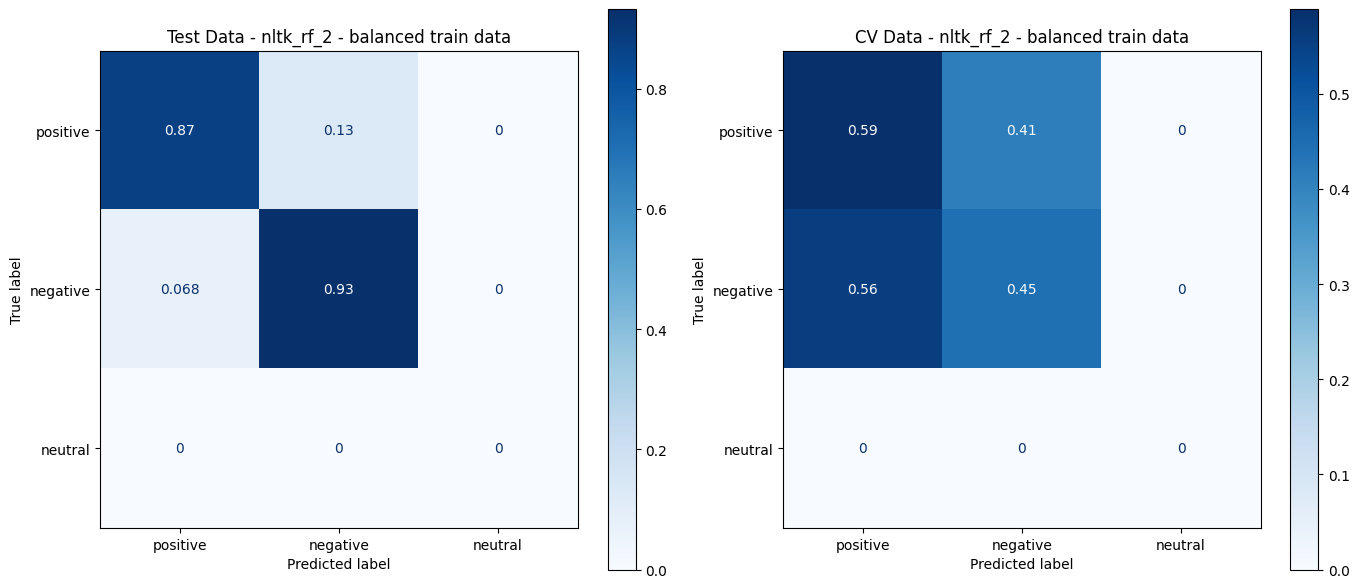

In [23]:
nltk_rf_model_2.fit(True)
nltk_rf_model_2.evaluate(True)

Test 3
- Lemmatizing: Yes
- Additional removal of words: Yes
- Remove URLs: Yes

In [24]:
nltk_rf_model_3 = utils.CustomPipeline(
    df,
    config.FEATURES,
    config.TARGET, 
    df_cv = df_cv,
    steps=[
        ("preprocessor", ColumnTransformer(
             transformers=[
                (f'nltk_{feature}', Pipeline([
                ('compound_splitter', utils.CompoundWordSplitter()),
                ('tokenizer', utils.NLTKTokenizer(extra_stop_words=False, lemmatize=True, remove_urls=True)),
                ('tfidf', TfidfVectorizer())
            ]), feature) for feature in config.FEATURES]
        )),
        ("classifier", RandomForestClassifier(random_state=config.RANDOM_STATE))
    ],
    model_name="nltk_rf_3"
)

In [25]:
# nltk_rf_model_3.fit(False)
# nltk_rf_model_3.evaluate(False)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   1.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.4s
Classification Report for nltk_rf_3 - balanced train data:
Classification Report - Validation set
               precision    recall  f1-score   support

    negative       0.81      0.95      0.88        74
    positive       0.96      0.84      0.90       102

    accuracy                           0.89       176
   macro avg       0.88      0.89      0.89       176
weighted avg       0.90      0.89      0.89       176

Classification Report - Crossvalidation set
               precision    recall  f1-score   support

    negative       0.43      0.70      0.53       600
    positive       0.68      0.41      0.51       949

    accuracy                           0.52      1549
   macro avg       0.56      0.55      0.52      1549
weighted avg       0.58      0.52      0.52      1549



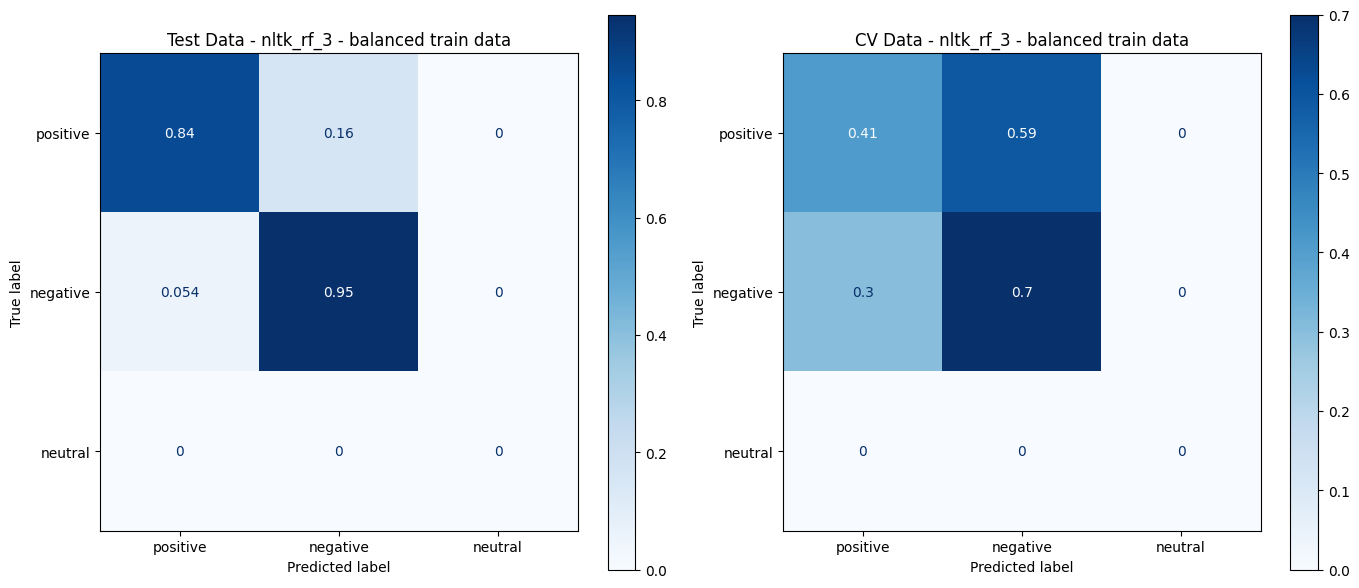

In [26]:
nltk_rf_model_3.fit(True)
nltk_rf_model_3.evaluate(True)